In [1]:
from product_class import Product
from category_class import Category
import numpy as np
from scipy import stats
import datetime
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
from workalendar.usa import UnitedStates
from operator import itemgetter
import pandas as pd
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter

import main

In [2]:
products1 = list(np.load('office_products_sorted_ph.npy', allow_pickle=True))
products2 = list(np.load('product_software_sorted_ph.npy', allow_pickle=True))
products3 = list(np.load('product_electronics_sorted_ph.npy', allow_pickle=True))
products4 = list(np.load('toy_products_sorted_ph.npy', allow_pickle=True))

products1 = [Product(i) for i in products1]
products2 = [Product(i) for i in products2]
products3 = [Product(i) for i in products3]
products4 = [Product(i) for i in products4]

cat1 = Category(products1)
cat2 = Category(products2)
cat3 = Category(products3)
cat4 = Category(products4)

/home/derek/anaconda3/envs/ECE143/lib/python3.7/site-packages/scipy/stats/stats.py:2315: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


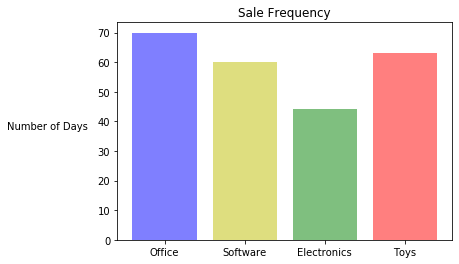

In [3]:
avg_of = cat1.calculate_avg_num_sales()
avg_so = cat2.calculate_avg_num_sales()
avg_el = cat3.calculate_avg_num_sales()
avg_toy = cat4.calculate_avg_num_sales()

colors = ['b', 'y', 'g', 'r']
cat_labels = ['Office', 'Software', 'Electronics', 'Toys']

y_pos = np.arange(len(cat_labels))
performance = [avg_of[0], avg_so[0], avg_el[0], avg_toy[0]]

plt.bar(y_pos, performance, align='center', alpha=0.5, color=colors)
plt.xticks(y_pos, cat_labels)
plt.ylabel('Number of Days',rotation=0, labelpad=50)
plt.title('Sale Frequency')

plt.show()

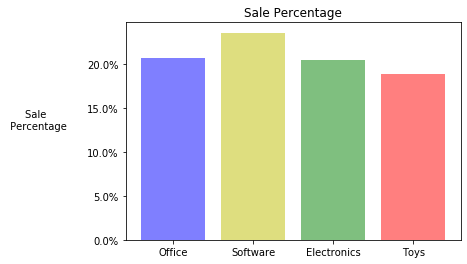

In [4]:
de_of = cat1.calculate_avg_sale_perc()
de_so = cat2.calculate_avg_sale_perc()
de_el = cat3.calculate_avg_sale_perc()
de_toy = cat4.calculate_avg_sale_perc()

performance = [de_of, de_so, de_el, de_toy]

plt.bar(y_pos, performance, align='center', alpha=0.5, color=colors)
plt.xticks(y_pos, cat_labels)
plt.ylabel('Sale \n Percentage',rotation=0, labelpad=50)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.title('Sale Percentage')

plt.show()

/home/derek/anaconda3/envs/ECE143/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


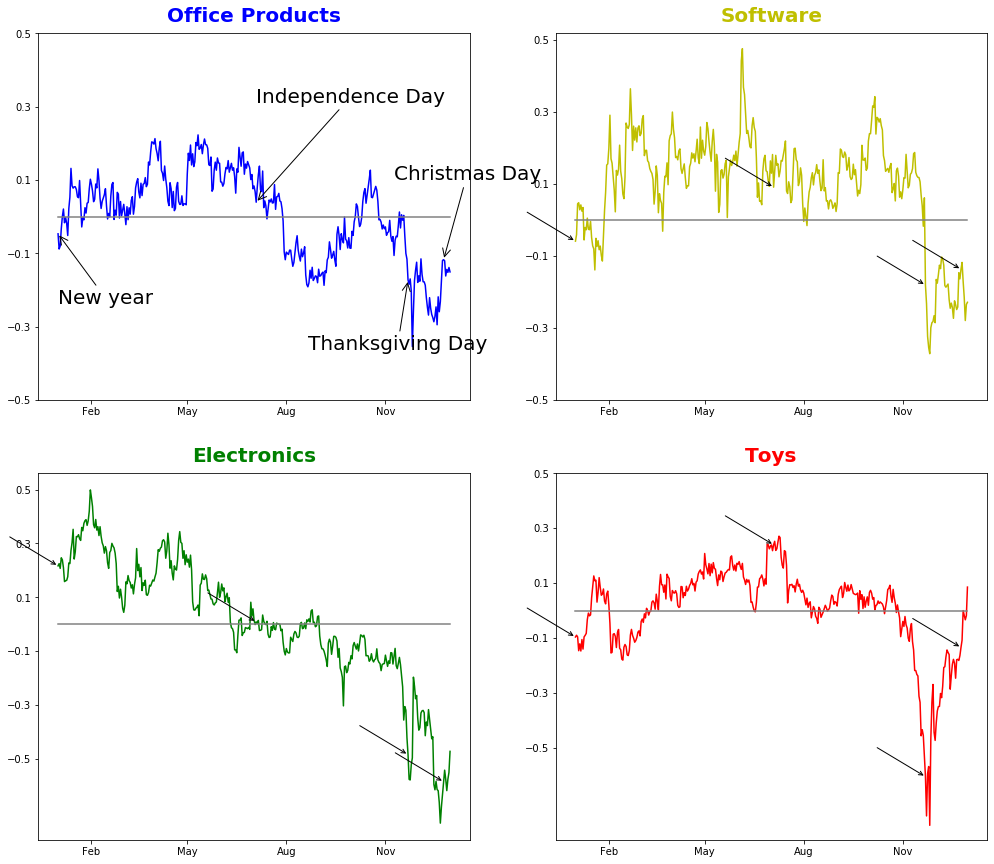

In [5]:
main.time_price(cat1,cat2,cat3,cat4)

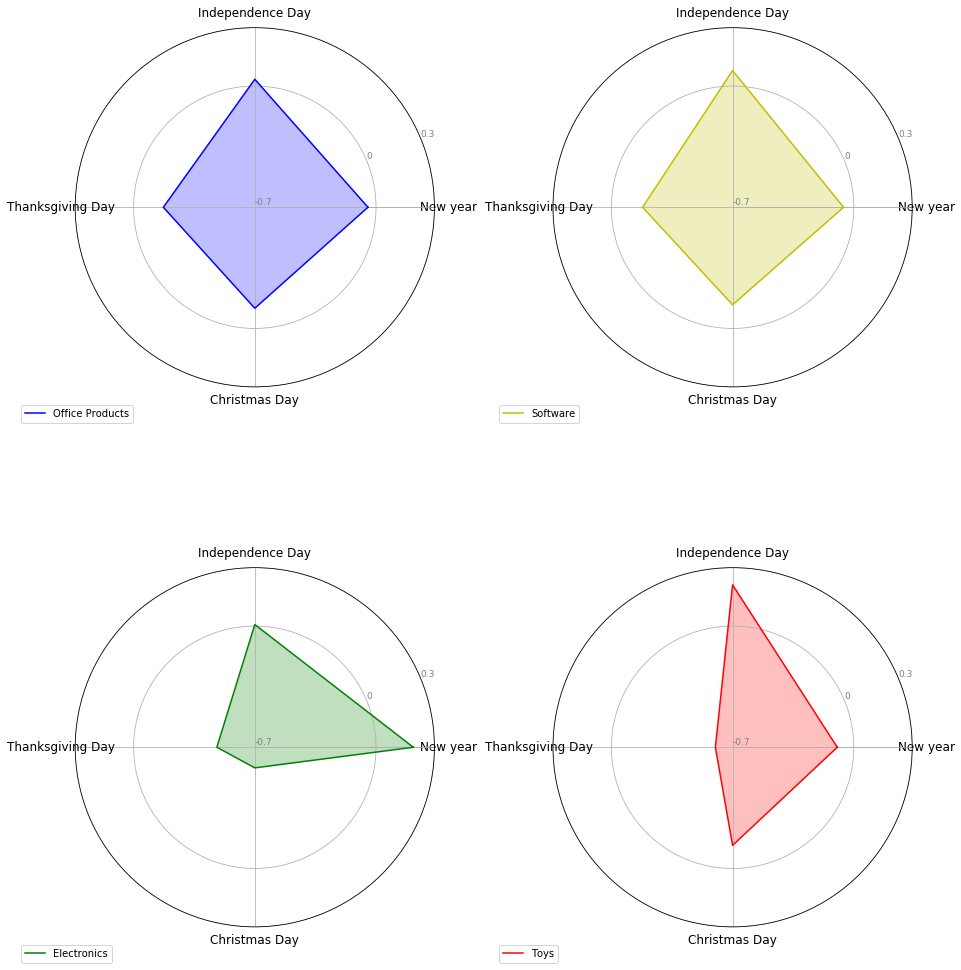

In [6]:
main.plot_holiday(cat1,cat2,cat3,cat4)

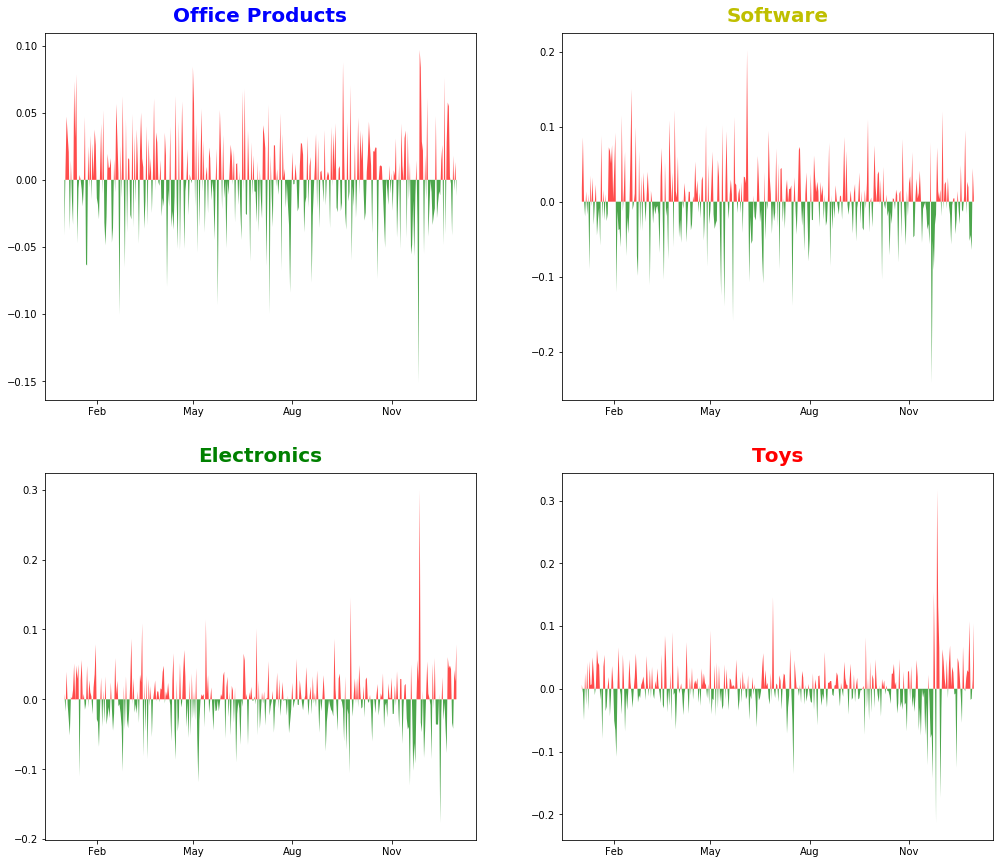

In [7]:
main.average_derivative_prices(cat1,cat2,cat3,cat4)

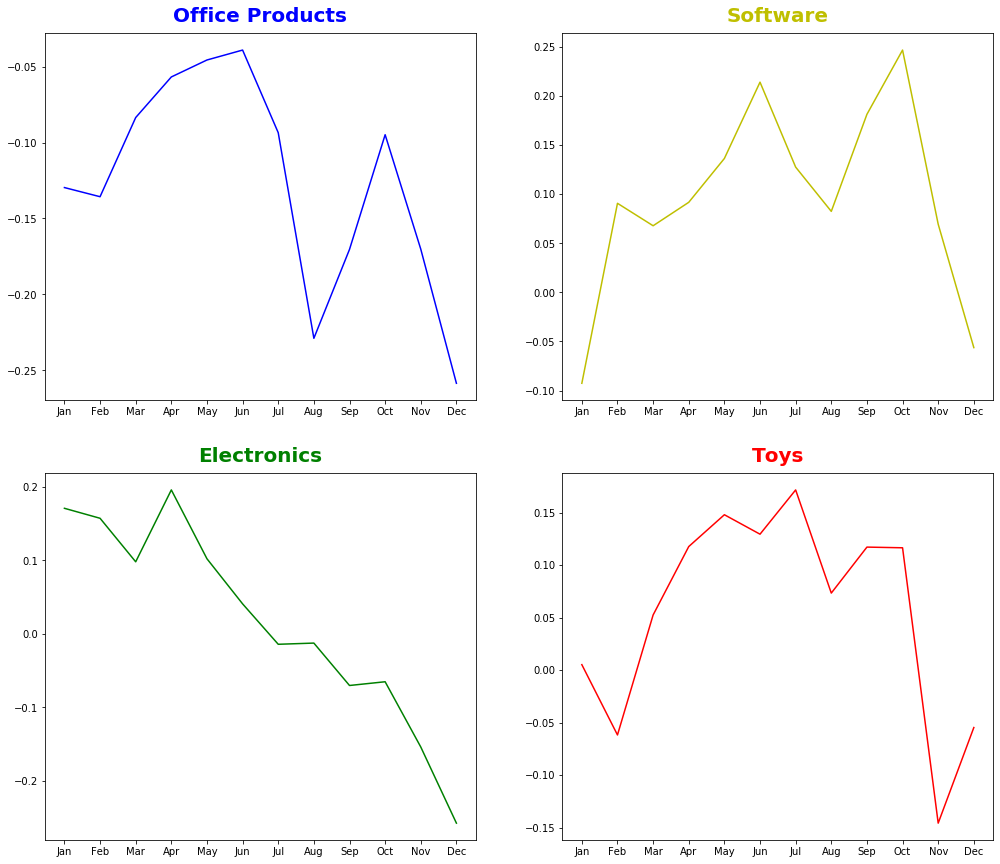

In [8]:
main.average_price_per_month_price(cat1,cat2,cat3,cat4)

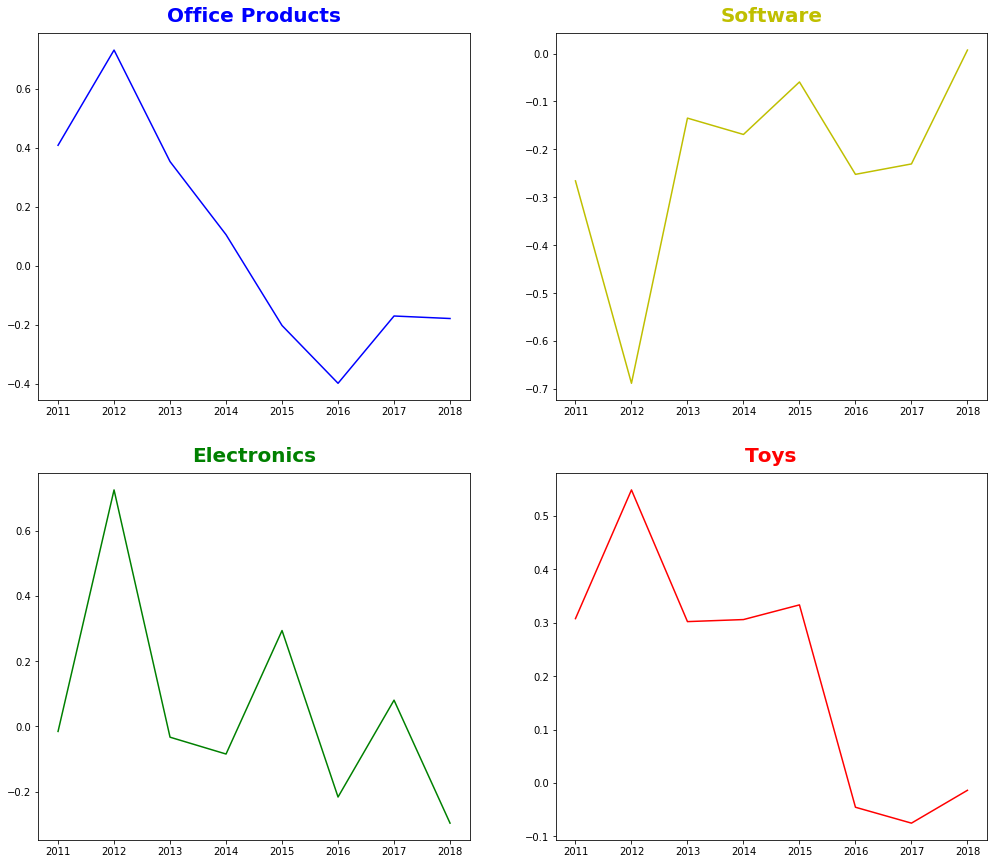

In [9]:
main.christmas_history_price(cat1,cat2,cat3,cat4)

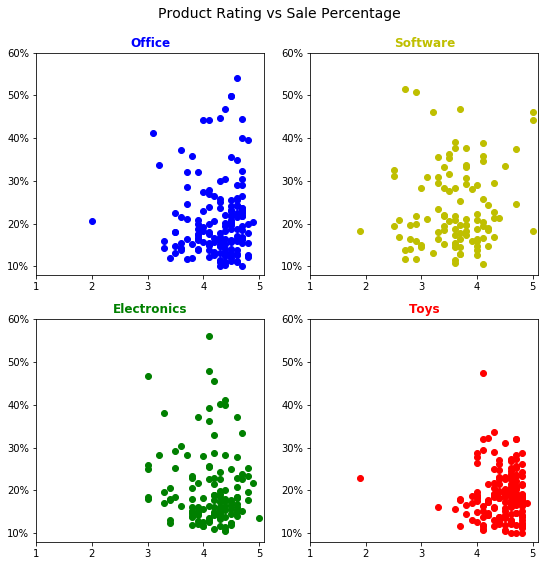

In [10]:
fig, axes = plt.subplots(figsize=(9, 9), nrows=2, ncols=2)
fig.suptitle("Product Rating vs Sale Percentage", y=0.95, fontsize=14)
categories = [cat1, cat2, cat3, cat4]

for i, color in enumerate(colors):
    plt.subplot(221 + i)
    x,y = categories[i].feature_correlation('rating', 'sale_percentage')
#     y = np.array(y)
#     y[y==None] = 0
    plt.scatter(x,y,color=color)
    plt.xlim([1,5.1])
    plt.ylim([0.08,0.6])
    ax = plt.gca()
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
    plt.title(cat_labels[i], color=color, fontweight='bold')


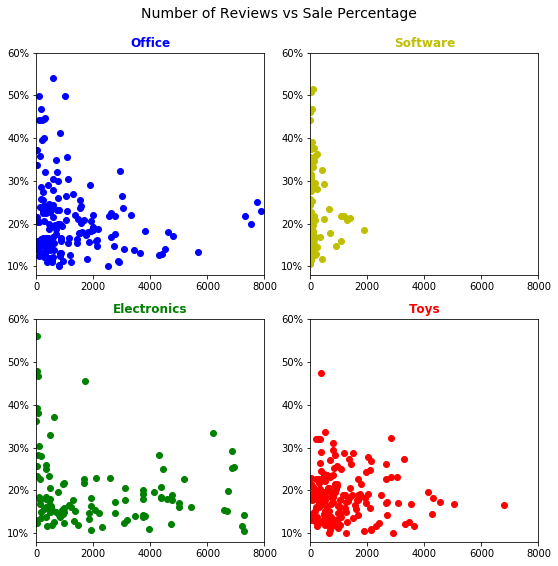

In [11]:
fig, axes = plt.subplots(figsize=(9, 9), nrows=2, ncols=2)
fig.suptitle("Number of Reviews vs Sale Percentage", y=0.95, fontsize=14)

for i, color in enumerate(colors):
    plt.subplot(221 + i)
    x,y = categories[i].feature_correlation('num_reviews', 'sale_percentage')
    plt.scatter(x,y,color=color)
    plt.xlim([0,8000])
    plt.ylim([0.08,0.6])
    ax = plt.gca()
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
    plt.title(cat_labels[i], color=color, fontweight='bold')

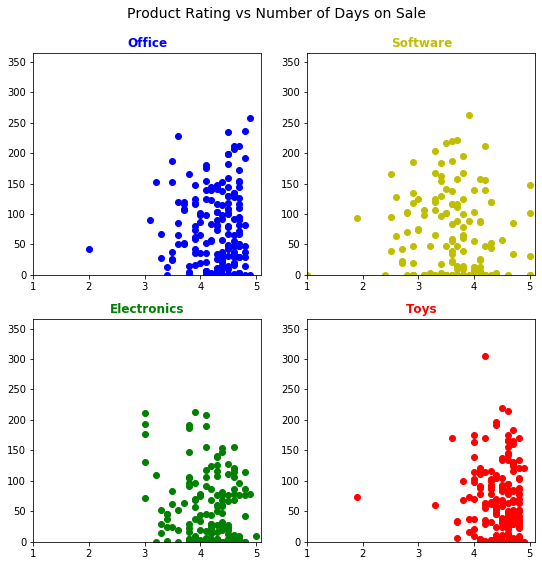

In [12]:
fig, axes = plt.subplots(figsize=(9, 9), nrows=2, ncols=2)
fig.suptitle("Product Rating vs Number of Days on Sale", y=0.95, fontsize=14)

for i, color in enumerate(colors):
    plt.subplot(221 + i)
    x,y = categories[i].feature_correlation('rating', 'num_sales')
    plt.scatter(x,y,color=color)
    plt.xlim([1,5.1])
    plt.ylim([0,365])
    plt.title(cat_labels[i], color=color, fontweight='bold')

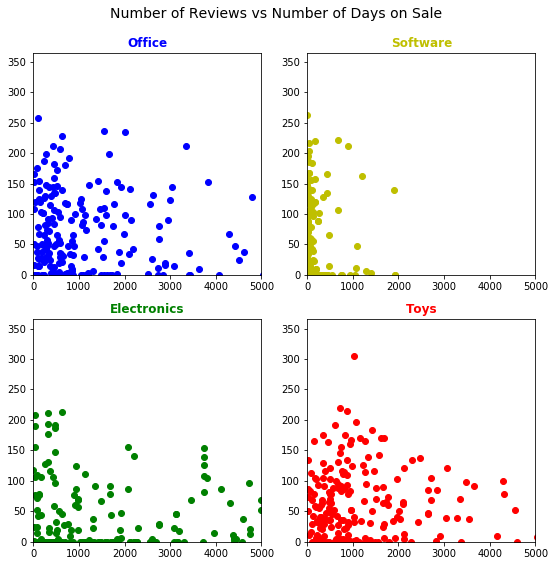

In [13]:
fig, axes = plt.subplots(figsize=(9, 9), nrows=2, ncols=2)
fig.suptitle("Number of Reviews vs Number of Days on Sale", y=0.95, fontsize=14)

for i, color in enumerate(colors):
    plt.subplot(221 + i)
    x,y = categories[i].feature_correlation('num_reviews', 'num_sales')
    plt.scatter(x,y,color=color)
    plt.xlim([0,5000])
    plt.ylim([0,365])
    plt.title(cat_labels[i], color=color, fontweight='bold')